
# Data Loading & Dataframe Creation & General Setup

In [ ]:
# Load data

!pip install mat73

from mat73 import loadmat
import pandas as pd
import numpy as np

data = loadmat('D5112-RS-SS0RC-W4-70-SepDB-30psi_D5112-Right_2021-09-23_11-32.mat')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Examine data composition

print("\ndata.keys(): \n{}".format(data.keys()))

x = data['vsd']

print("\ntype(data['vsd']): \n{}".format(type(x)))

print("\ndata['vsd'].keys(): \n{}".format(x.keys()))


data.keys(): 
dict_keys(['vsd'])

type(data['vsd']): 
<class 'dict'>

data['vsd'].keys(): 
dict_keys(['coord', 'data', 'filename', 'frequency', 'labels', 'splitLabels', 'splits', 'time', 'units'])


In [ ]:
# Create dataframe

df = pd.DataFrame(x['data']).transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,-0.001659,0.000067,359.312317,8.667354,37.922119,-792.834717,11.102067,-5.874314,-1.986910,37.922367,...,0.0,-0.006744,-0.122006,0.010293,0.010293,-0.122006,0.023352,30.072489,0.709834,37.741531
1,-0.002017,0.000096,359.313446,9.220880,40.309624,-796.290100,11.765387,-5.408507,-2.284521,40.309952,...,0.0,-0.011327,-0.119669,0.009718,0.009718,-0.119669,0.023217,30.072489,0.681822,15.376180
2,-0.002423,0.000106,359.315033,9.244136,42.407356,-799.427368,12.294152,-4.971526,-2.628620,42.407749,...,0.0,-0.013287,-0.117351,0.009606,0.009606,-0.117351,0.023321,30.072489,0.711062,22.831297
3,-0.002827,0.000094,359.316711,8.848499,43.969204,-802.325928,12.623202,-4.596466,-2.963815,43.969639,...,0.0,-0.004678,-0.115308,0.005552,0.005552,-0.115308,0.023196,30.072489,0.770503,71.755508
4,-0.003185,0.000065,359.318115,8.158639,44.718006,-805.014160,12.668658,-4.304827,-3.249876,44.718460,...,0.0,-0.013241,-0.113610,0.004425,0.004425,-0.113610,0.023238,30.072489,0.794769,68.493889


In [ ]:
# Incorporate units, time, etc. into dataframe
# Each column name will be a tuple (coord, labels, units)

# An extra column for time will be added

# Column replacement

new_columns = []
for i in range(213):
  column = x['labels'][i][0]
  new_columns.append(column)
df.columns = new_columns

df.head()

,SA Filtered - Slip Angle Filtered,IA Filtered - Inclination Angle Filtered,RL Filtered - Loaded Radius Filtered,FXtd Filtered - Longitudinal Force Filtered,FYtd Filtered - Lateral Force Filtered,FZtd Filtered - Normal Force Filtered,MXtd Filtered - Overturning Moment Filtered,MYtd Filtered - Rolling Resistance Moment Filtered,MZtd Filtered - Aligning Moment Filtered,FYRd Filtered - Cornering Force Filtered,...,Yb Command - Belt Position Command,IActlr V Cmd - Inclination Angle V Cmd,RLctlr V Cmd - Loaded Radius V Cmd,SActlr V Cmd - Slip Angle V Cmd,FYctlr V Cmd - Lateral Force V Cmd,FZctlr V Cmd - Vertical Load V Cmd,VSDctlr V Cmd - Spindle Velocity V Cmd,Tst8 Unfiltered - Tire Surface Temp 8 Unfiltered,Yb Unfiltered - Belt Position Unfiltered,Trdwydrvest Unfiltered - Torque Roadway Drive Estimate Unfiltered
0,-0.001659,0.000067,359.312317,8.667354,37.922119,-792.834717,11.102067,-5.874314,-1.986910,37.922367,...,0.0,-0.006744,-0.122006,0.010293,0.010293,-0.122006,0.023352,30.072489,0.709834,37.741531
1,-0.002017,0.000096,359.313446,9.220880,40.309624,-796.290100,11.765387,-5.408507,-2.284521,40.309952,...,0.0,-0.011327,-0.119669,0.009718,0.009718,-0.119669,0.023217,30.072489,0.681822,15.376180
2,-0.002423,0.000106,359.315033,9.244136,42.407356,-799.427368,12.294152,-4.971526,-2.628620,42.407749,...,0.0,-0.013287,-0.117351,0.009606,0.009606,-0.117351,0.023321,30.072489,0.711062,22.831297
3,-0.002827,0.000094,359.316711,8.848499,43.969204,-802.325928,12.623202,-4.596466,-2.963815,43.969639,...,0.0,-0.004678,-0.115308,0.005552,0.005552,-0.115308,0.023196,30.072489,0.770503,71.755508
4,-0.003185,0.000065,359.318115,8.158639,44.718006,-805.014160,12.668658,-4.304827,-3.249876,44.718460,...,0.0,-0.013241,-0.113610,0.004425,0.004425,-0.113610,0.023238,30.072489,0.794769,68.493889


In [ ]:
# Time column insertion

df['Time'] = x['time']
df.head()

,SA Filtered - Slip Angle Filtered,IA Filtered - Inclination Angle Filtered,RL Filtered - Loaded Radius Filtered,FXtd Filtered - Longitudinal Force Filtered,FYtd Filtered - Lateral Force Filtered,FZtd Filtered - Normal Force Filtered,MXtd Filtered - Overturning Moment Filtered,MYtd Filtered - Rolling Resistance Moment Filtered,MZtd Filtered - Aligning Moment Filtered,FYRd Filtered - Cornering Force Filtered,...,IActlr V Cmd - Inclination Angle V Cmd,RLctlr V Cmd - Loaded Radius V Cmd,SActlr V Cmd - Slip Angle V Cmd,FYctlr V Cmd - Lateral Force V Cmd,FZctlr V Cmd - Vertical Load V Cmd,VSDctlr V Cmd - Spindle Velocity V Cmd,Tst8 Unfiltered - Tire Surface Temp 8 Unfiltered,Yb Unfiltered - Belt Position Unfiltered,Trdwydrvest Unfiltered - Torque Roadway Drive Estimate Unfiltered,Time
0,-0.001659,0.000067,359.312317,8.667354,37.922119,-792.834717,11.102067,-5.874314,-1.986910,37.922367,...,-0.006744,-0.122006,0.010293,0.010293,-0.122006,0.023352,30.072489,0.709834,37.741531,0.000000
1,-0.002017,0.000096,359.313446,9.220880,40.309624,-796.290100,11.765387,-5.408507,-2.284521,40.309952,...,-0.011327,-0.119669,0.009718,0.009718,-0.119669,0.023217,30.072489,0.681822,15.376180,0.007812
2,-0.002423,0.000106,359.315033,9.244136,42.407356,-799.427368,12.294152,-4.971526,-2.628620,42.407749,...,-0.013287,-0.117351,0.009606,0.009606,-0.117351,0.023321,30.072489,0.711062,22.831297,0.015625
3,-0.002827,0.000094,359.316711,8.848499,43.969204,-802.325928,12.623202,-4.596466,-2.963815,43.969639,...,-0.004678,-0.115308,0.005552,0.005552,-0.115308,0.023196,30.072489,0.770503,71.755508,0.023438
4,-0.003185,0.000065,359.318115,8.158639,44.718006,-805.014160,12.668658,-4.304827,-3.249876,44.718460,...,-0.013241,-0.113610,0.004425,0.004425,-0.113610,0.023238,30.072489,0.794769,68.493889,0.031250


In [ ]:
df_no_time = df.drop('Time', axis=1)
FREQUENCY = x['frequency']

In [ ]:
# Set up associated value groupings for easy graphing and analysis



# Data Exploration

## File Analysis

In [ ]:
# Examine data shapes and types

print("Data types of each value in data['vsd']: \n")

for key in x:
    print(key + ": " + str(type(x[key])))

print("\nShape of each value in data['vsd']: \n")

for key in x:
    if isinstance(x[key], list): 
      print(key + ": " + str(len(x[key])))
    elif isinstance(x[key], np.ndarray):
      print(key + ": {}".format((x[key].shape)))

print("\nView value in data['vsd']: \n")

for key in x:
  print(key + ": \n{}\n\n".format(x[key]))

Data types of each value in data['vsd']: 

coord: <class 'list'>
data: <class 'numpy.ndarray'>
filename: <class 'str'>
frequency: <class 'numpy.ndarray'>
labels: <class 'list'>
splitLabels: <class 'list'>
splits: <class 'list'>
time: <class 'numpy.ndarray'>
units: <class 'list'>

Shape of each value in data['vsd']: 

coord: 213
data: (213, 313344)
frequency: ()
labels: 213
splitLabels: 1
splits: 1
time: (313344,)
units: 213

View value in data['vsd']: 

coord: 
[['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['SAE Legacy'], ['Common'], ['Common'], ['Common'], ['Common'], ['Common'], ['Common'], ['Common'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Controller'], ['Misc'], ['Misc'], ['Misc'], ['Misc'], ['Misc'],

In [ ]:
# Check unique values in each list

# Coord

unique_coord = []

for element in x['coord']:
  if not element in unique_coord:
    unique_coord.append(element)

# Labels

unique_labels = []

for element in x['labels']:
  if not element in unique_labels:
    unique_labels.append(element)
  
# Print unique lists

print("Unique values in x['coord']: {}".format(unique_coord))
print("Number of unique values in x['labels']: {}".format(len(unique_labels)))

Unique values in x['coord']: [['SAE Legacy'], ['Common'], ['Controller'], ['Misc'], ['Z down'], ['User'], ['Whl Heading'], ['Spindle Accels and Velocities'], ['Machine'], ['JASO'], ['Measured Accels']]
Number of unique values in x['labels']: 212


In [ ]:
# Investigate x['splits'] further

x['splits'][0].shape

(313328,)

My observations:



*   It looks like there are 213 dimensions for each test.
*   There are a total of 313344 total examples or tests.
*   It seems like the coord, labels, and units would go with the dimensions



## Data Graphing

In [ ]:
# Analyze a single variable vs. time

import matplotlib.pyplot as plt

label_index = 62
start_time = 0
end_time = df.shape[0]

start = round(start_time * FREQUENCY)
end = round(end_time * FREQUENCY)

xAxis = df['Time'].iloc[start:end]
yAxis = df.iloc[start:end, label_index]
plt.plot(xAxis,yAxis, color='blue')
plt.xlabel('Time')
plt.ylabel(df.columns[label_index])
plt.figure(figsize=(100, 100))

plt.show()

NameError: ignored

In [ ]:
# Compare filtered and unfiltered values

import matplotlib.pyplot as plt

label_index1 = 0
label_index2 = 68
start_time = 0
end_time = df.shape[0]

start = round(start_time * FREQUENCY)
end = round(end_time * FREQUENCY)

xAxis1 = df['Time'].iloc[start:end]
yAxis1 = df.iloc[start:end, label_index1]
plt.plot(xAxis1,yAxis1, label=df.columns[label_index1])

xAxis2 = df['Time'].iloc[start:end]
yAxis2 = df.iloc[start:end, label_index2]
plt.plot(xAxis1,yAxis1, label=df.columns[label_index2])

plt.xlabel('Time')
plt.legend()
plt.title('Filtered vs. Unfiltered')
plt.figure(figsize=(100, 100))

plt.show()

In [ ]:
# Compare command and feedback values

import matplotlib.pyplot as plt

label_index1 = 0
label_index2 = 39
start_time = 0
end_time = df.shape[0]

start = round(start_time * FREQUENCY)
end = round(end_time * FREQUENCY)

xAxis1 = df['Time'].iloc[start:end]
yAxis1 = df.iloc[start:end, label_index1]
plt.plot(xAxis1,yAxis1, label=df.columns[label_index1])

xAxis2 = df['Time'].iloc[start:end]
yAxis2 = df.iloc[start:end, label_index2]
plt.plot(xAxis1,yAxis1, label=df.columns[label_index2])

plt.xlabel('Time')
plt.legend()
plt.title('Command vs. Feedback')
plt.figure(figsize=(100, 100))

plt.show()

##Tests

### Normality Test

In [ ]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

new_columns = new_columns.append('Time')
df_scaled = pd.DataFrame(data = df_scaled, columns = new_columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Source: https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5

from scipy.stats import jarque_bera

normal_cols = []
for col in df_scaled.columns:
  score, p_value = jarque_bera(df_scaled[[col]])
  normal_cols.append(score)

print(normal_cols)

# Unfortunately, it appears that the data does not exhibit any normality in its current state and also with standard scaling

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1688: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1689: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


[107484.33052309406, 1004546.0280809291, 3962585.499258625, 524803.069093439, 109138.40751855899, 20080.295264458327, 2245588.9046685854, 20668847.062870435, 553150.131365063, 103295.55479601119, 568132.8420471066, 515604.26115123986, 1969031.6757911728, 653617.6882691262, 653619.2084175186, 2794907578680.12, 1967376.2836282088, 653225.0572917627, 703224.2218182681, 355333194.31304014, 134139.89151304346, 372868.1343927961, 107349.08247018303, nan, 724794.3655549193, nan, 20076.84381209095, 5005873642749.328, 1969306.4825127362, 5366348.904721229, 670732.4304991952, 7829175072.368195, 905243.7873451123, 231944.2403706863, 137114.09505877088, 119876.44931491198, 405351.53216180054, 23035.41144049058, 24536.164002317393, 107349.08247018303, 2365743929089.068, 1969031.6757911728, 167717.82365281053, 699172.3303504501, 18778.30342868206, 110577.83487500405, 522709.9187005952, 19882.291266784367, 673434.4837060269, 1366455.9667516695, 573313.3895199639, 1969031.6757911728, 3519884.995716333

### Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

stationary_cols = []
for col in df.columns:
  adf = adfuller(df[col])
  p_value = adf[1]
  if p_value < 0.05:
    stationary_cols.append(col)

print(stationary_cols)

## Dimensionality Reduction

In [ ]:
# Scale the data to prepare it for PCA

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


<class 'numpy.ndarray'>


In [ ]:
print(type(df_scaled))
print(df_scaled.shape)

<class 'numpy.ndarray'>
(313344, 214)


In [ ]:
new_columns = new_columns.append('Time')
df_scaled = pd.DataFrame(data = df_scaled, columns = new_columns)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,0.001385,0.031865,1.028759,-0.107974,-0.033316,1.541713,0.367143,0.133773,0.017291,-0.032821,...,0.556033,0.303953,0.059452,0.059452,0.303953,-0.165710,-3.305139,3.878652,-0.105567,-1.732045
1,0.001125,0.046371,1.028836,-0.107850,-0.032585,1.540729,0.389949,0.135525,0.015592,-0.032090,...,0.155056,0.320668,0.051487,0.051487,0.320668,-0.165787,-3.305139,3.724509,-0.116262,-1.732034
2,0.000830,0.051566,1.028945,-0.107845,-0.031943,1.539835,0.408128,0.137169,0.013627,-0.031448,...,-0.016410,0.337252,0.049928,0.049928,0.337252,-0.165728,-3.305139,3.885412,-0.112697,-1.732023
3,0.000537,0.045316,1.029061,-0.107933,-0.031465,1.539009,0.419441,0.138580,0.011713,-0.030970,...,0.736752,0.351871,-0.006233,-0.006233,0.351871,-0.165799,-3.305139,4.212500,-0.089301,-1.732012
4,0.000277,0.030982,1.029157,-0.108087,-0.031236,1.538244,0.421003,0.139678,0.010079,-0.030741,...,-0.012395,0.364014,-0.021848,-0.021848,0.364014,-0.165775,-3.305139,4.346036,-0.090861,-1.732001


In [ ]:
# Test eligibility for dimensionality reduction using correlation matrix

correlation_matrix = df_scaled.corr()

print("Correlation matrix type: {}\n".format(type(correlation_matrix)))

Correlation matrix type: <class 'pandas.core.frame.DataFrame'>



In [ ]:
# Check number of entries that exceed threshold = 0.33
# Vast number of data entries show little to no correlation

TOTAL_ENTRIES = 214*214-214

correlation_matrix_threshold1 = correlation_matrix[correlation_matrix > -0.1].count()

correlation_matrix_threshold2 = correlation_matrix[correlation_matrix > 0.1].count()

correlation_matrix_threshold = correlation_matrix_threshold1 - correlation_matrix_threshold2

print(type(correlation_matrix_threshold))

print("\nPercent of entries with correlation between -0.1 and 0.1: {}".format(correlation_matrix_threshold.sum()/TOTAL_ENTRIES))

<class 'pandas.core.series.Series'>

Percent of entries with correlation between -0.1 and 0.1: 0.6755298144004213


In [ ]:
# Randomly sample rows

df_sample = df.sample(frac=0.9)

In [ ]:
# PCA and visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_scaled)
# transform data onto the first two principal components
df_pca = pca.transform(df_scaled)
print("Original shape: {}".format(str(df_scaled.shape)))
print("Reduced shape: {}".format(str(df_pca.shape)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Original shape: (282010, 214)
Reduced shape: (282010, 2)


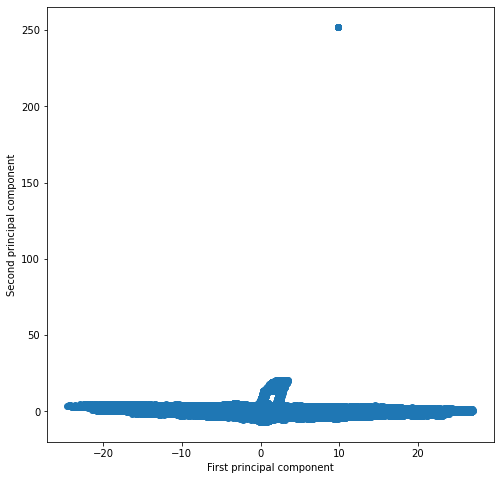

In [ ]:
# Plot reduced shape

import matplotlib.pyplot as plt

first_component = list(df_pca[:, 0])
second_component = list(df_pca[:,1])

plt.figure(figsize=(8, 8))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.scatter(first_component, second_component)
plt.show()

# Model Tests

##Isolation Forest

In [ ]:
# Create and run model

from sklearn.ensemble import IsolationForest

iforest = IsolationForest(random_state = 0, contamination= 0.0001)

predictions = iforest.fit_predict(df_no_time)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
No handles with labels found to put in legend.


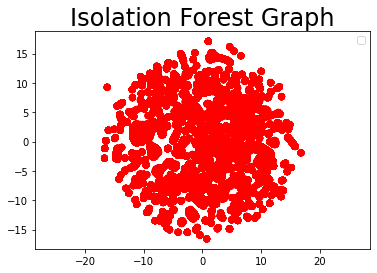

In [ ]:
# Plot results using UMAP

!pip install umap-learn
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

scaled_data = StandardScaler().fit_transform(df_no_time)
reducer = umap.UMAP()

embedding = reducer.fit_transform(scaled_data)
cmap = ListedColormap(["blue", "red"])

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c= predictions, cmap = cmap)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Isolation Forest Graph', fontsize=24)
plt.legend()

plt.show()


In [ ]:
# Plot results with t-SNE



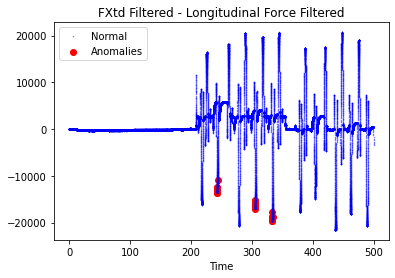

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# Overplotting tips: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python 

# Plotting anomaly predictions on time series graphs

import matplotlib.pyplot as plt

df["Anomaly Prediction"] = predictions

# Easy input parameters

label = 'FXtd Filtered - Longitudinal Force Filtered'
start_time = 0
end_time = 500

# Calculations on input parameters

start = round(start_time * FREQUENCY)
end = round(end_time * FREQUENCY)
label_index = df.columns.get_loc(label)
 
# Split df based on anomaly group

df_anomalies = df.loc[df['Anomaly Prediction'] == -1]
df_normal = df.loc[df['Anomaly Prediction'] == 1]

# Plot normal points

plt.plot(df_normal.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)]['Time'], df_normal.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)].iloc[:, label_index], marker="o", label='Normal', color = "blue", linestyle='', alpha = 0.5, markersize = 0.5)

# Plot anomalies

plt.scatter(df_anomalies.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)]['Time'], df_anomalies.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)].iloc[:, label_index], marker="o", label='Anomalies', c = "red")

plt.legend()

plt.xlabel('Time')
plt.title(df.columns[label_index])
plt.figure(figsize=(100, 100))

plt.show()

##Local Outlier Factor

In [ ]:
# Source: https://arshren.medium.com/anomaly-detection-using-local-outlier-factor-4e52f16894f 

from sklearn.neighbors import LocalOutlierFactor as LOF



##Autoencoder

In [ ]:
# Sample implementations: https://colab.research.google.com/drive/1TXaQzsSj2q0E3Ni1uxFDXGpY1SCnu46v?usp=sharing#scrollTo=ACFZcFWEFNpQ.  
# https://www.kaggle.com/code/robinteuwens/anomaly-detection-with-auto-encoders/notebook. 

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
# Min-Max Scaling

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
df_no_time_scaled = min_max_scaler.fit_transform(df_no_time)

In [ ]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

##LSTM Autoencoder

In [ ]:
# Sample implementation:  https://towardsdatascience.com/lstm-autoencoder-for-anomaly-detection-e1f4f2ee7ccf 

